
<div align="center">
    <h1>Atividade 3 - Caio Sousa Mendes e Felipe Baqueiro </h1>
    <h3>ENGG67- T01 - Tópicos especiais em engenharia de computação </h3>
    <h4>Prof.: Antônio C. L. Fernandes Júnior</h4>
</div>

 <br>
 
<font size="3"><b> Importação do banco de dados "winequality" para a regressão utilizando Multilayer Perceptron (MLP) com método de validação cruzada k-fold.</b>  </font>  


In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from statistics import mean
from sklearn.metrics import accuracy_score 
from sklearn.metrics import explained_variance_score as evs
from sklearn.metrics import mean_squared_error
from sklearn.neural_network import MLPRegressor

dadosVinho = pd.read_csv('./winequality-red.csv')

print("Quantidade de objetos do banco de dados:", dadosVinho.shape[0])
print("Quantidade de atributos do banco de dados:", dadosVinho.shape[1])

dadosVinho.sample(5)

Quantidade de objetos do banco de dados: 1599
Quantidade de atributos do banco de dados: 12


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1331,7.8,0.87,0.26,3.8,0.107,31.0,67.0,0.99668,3.26,0.46,9.2,5
906,7.2,0.54,0.27,2.6,0.084,12.0,78.0,0.99640,3.39,0.71,11.0,5
552,9.5,0.46,0.24,2.7,0.092,14.0,44.0,0.99800,3.12,0.74,10.0,6
1283,8.7,0.63,0.28,2.7,0.096,17.0,69.0,0.99734,3.26,0.63,10.2,6
434,10.4,0.41,0.55,3.2,0.076,22.0,54.0,0.99960,3.15,0.89,9.9,6


 <br>
<font size="4">  
    <b >Histograma da classe alvo quality</b>
</font> 

Text(0.5, 1.0, 'Classe alvo: quality')

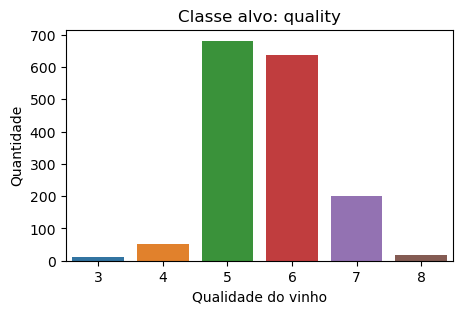

In [22]:

fig1,figuraQualidade = plt.subplots(figsize=(5,3))
sns.countplot(x = dadosVinho['quality'])
figuraQualidade.set_xlabel('Qualidade do vinho')
figuraQualidade.set_ylabel('Quantidade')
figuraQualidade.set_title('Classe alvo: quality')

Podemos observar que a classe está altamente concentrada em dois valores, assim havendo um desbalanceamento que pode influenciar no desempenho da regressão.

 <br>
<font size="4">  
    <b>Normalização dos dados</b>
</font> 

In [23]:
from sklearn import preprocessing

x = dadosVinho.drop(['quality'], axis = 1)

arrayNormalizacao = preprocessing.normalize(x)
dadosNormalizados = pd.DataFrame(arrayNormalizacao, columns = x.columns)
dadosNormalizados.sample(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
1482,0.441968,0.035603,0.033148,0.128907,0.006998,0.184153,0.552460,0.061212,0.204410,0.034989,0.632260
1254,0.182745,0.016400,0.001406,0.044515,0.001851,0.468577,0.820010,0.023342,0.079658,0.016166,0.255374
295,0.345290,0.015986,0.014707,0.079928,0.002334,0.159856,0.863224,0.031974,0.097512,0.020462,0.303727
1486,0.243475,0.024347,0.007519,0.075191,0.002506,0.322246,0.823518,0.035643,0.121021,0.021483,0.368793
1424,0.299436,0.009380,0.013348,0.050507,0.002742,0.288613,0.829761,0.035983,0.117610,0.025254,0.346335


 <br>
<font size="4">  
    <b>Separação da classe alvo</b>
</font> 

In [24]:
y = dadosVinho['quality']

<br>
<font size="4">  
    <b>MLP regressor com 12 neurônios na camada escondida e 1 neurônio na camada de saida</b>
</font> 

In [64]:
mlp = MLPRegressor(hidden_layer_sizes = (12), 
                    random_state=3, 
                    activation = 'relu')

<br>
<font size="4">  
    <b>Separação 70% do banco de dados para treinamento e 30% para teste</b>
</font> 

In [26]:
train_X, test_X, train_y, test_y = train_test_split(x, y, test_size = 0.3, random_state = 20)

<br>
<font size="4">  
    <b>Validação cruzada k-fold, com 5 partições (k = 5)</b>
</font> 

Com o método k-fold, podemos plotar a curva de perda a decorrer das épocas utilizando a métrica para regressão Erro Quadrático Médio (MSE). Esse método nos ajuda a estimar o desempenho do modelo.

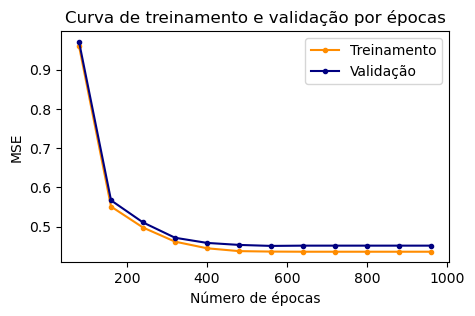

In [65]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import validation_curve
import warnings
warnings.filterwarnings("ignore")


param_range = np.arange(0,1000,80) 
k = 5
kfold  = KFold(n_splits = k , shuffle=True)

train_scores, test_scores = validation_curve(
                            mlp, train_X, train_y, param_name="max_iter", param_range=param_range,
                            scoring="neg_mean_squared_error", cv=kfold)

train_scores_mean = -np.mean(train_scores, axis=1)
test_scores_mean = -np.mean(test_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)


plt.figure(figsize=(5, 3))
plt.title("Curva de treinamento e validação por épocas")
plt.xlabel("Número de épocas")
plt.ylabel("MSE")

plt.plot(param_range, train_scores_mean, label="Treinamento", color="darkorange", marker='.')
plt.plot(param_range, test_scores_mean, label="Validação", color="navy", marker='.')
plt.legend(loc="best")
plt.show()


O gráfico acima está iterando percorrendo de 0 a 1000 épocas em intervalos de 80 épocas calculando seu MSE. 

Podemos observar que o modelo converge e permanece constante com a diferença de erro pequena entre as curvas de validação e treinamento a partir de 450 épocas aproximadamente.


<br>
<font size="4">  
    <b>Erro quadrático médio com banco de dados teste:</b>
</font> 

In [67]:
mlp.fit(train_X,train_y)
pred = mlp.predict(test_X)
print("Erro quadrático médio:", mean_squared_error(test_y, pred))


Erro quadrático médio: 0.4881707241720792


<br>
<font size="4">  
    <b>Erro absoluto médio com banco de dados teste:</b>
</font> 

In [68]:
from sklearn.metrics import mean_absolute_error

print("Erro absoluto médio:", mean_absolute_error(test_y, pred))


Erro absoluto médio: 0.5242629921217307


A escala da classe alvo quality é (3,4,5,6,7,8). Então esses erros calculados são razoáveis, considerando o desbalanceamento da classe.

<br>
<font size="4">  
    <b>Comparação quality real vs quality treinado:</b>
</font> 

Text(0.5, 1.0, '')

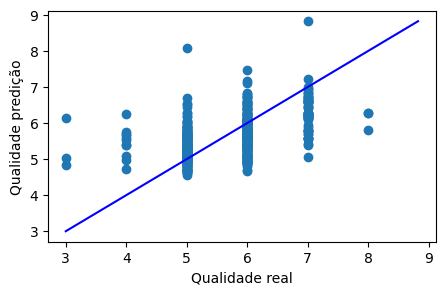

In [88]:
fig1,figPredicao = plt.subplots(figsize=(5,3))
figPredicao.scatter(test_y,pred, marker="o")
p1 = max(max(pred), max(test_y))
p2 = min(min(pred), min(test_y))

figPredicao.plot([p1, p2], [p1, p2], 'b-')
figPredicao.set_xlabel('Qualidade real')
figPredicao.set_ylabel('Qualidade predição')
figPredicao.set_title('')

Com o gráfico acima, conseguimos visualizar que a maior concentração das predições com menor erro estão entre os valores 5 e 6. Esse fenômeno ocasionado pelo desbalanceamento. 

Algumas predições foram calculadas com erro elevado em comparação com o valor real.


<br>
<font size="4">  
    <b>Uma predição exemplo com o modelo treinado:</b>
</font> 


In [70]:
#Dados do objeto nº 407

fixedAcidity = 12.00000
volatileAcidity = 0.39000
citricAcid = 0.66000
residualSugar = 3.00000
chlorides = 0.09300
freeSulfurDioxide = 12.00000
totalSulfurDioxide = 30.00000
density = 0.99960
pH = 3.18000
sulphates = 0.63000
alcohol = 10.80000
mlp.fit(train_X, train_y)

predicao = mlp.predict([[fixedAcidity,volatileAcidity,citricAcid,residualSugar,
                                 chlorides,freeSulfurDioxide,totalSulfurDioxide,
                                 density,pH,sulphates,alcohol],])

print("Qualidade do vinho (tabela): ", test_y[407])
print("Qualidade do vinho (resultado regressão MLP): ", predicao)


Qualidade do vinho (tabela):  7
Qualidade do vinho (resultado regressão MLP):  [6.10761965]


Por tanto, como a classe alvo está desbalanceada, algumas predições obtiveram maiores erros, como por exemplo o apresentado acima.
Para diminuir esse MSE e consequentemente melhorar o desempenho da regressão nesse modelo, o balanceamento da classe alvo é necessário, pois o modelo irá tender o resultado para as classes com maior frequência (quality = 5 e quality = 6).

Ou seja, o modelo irá atender bem na média para objetos que estão próximos dos valores relacionados a quality = 5 e 6.